In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#Initialization
f=np.zeros((3,N+1,t_number))
f0 = np.zeros((3, N+1))
f1 = np.zeros((3, N+1))
f_eil=np.zeros((3, N+1))
D_p=np.zeros((N+1))
D_m=np.zeros((N+1))
Y_p=np.zeros((N+1))
Y_m=np.zeros((N+1))


p1 = 0.7
p2 = 0.8
ro1 = 0.9
ro2 = 1.1
u1 = 1
u2 = 0.6

gamma = 1.4
q = 0.05

In [73]:
initial(f)

In [74]:
#Calculation
for n in range(0, t_number-1):
    f[:,:,n+1]=nextLayer(f,n)
r_v_p=getOriginal_r_v_p(f)

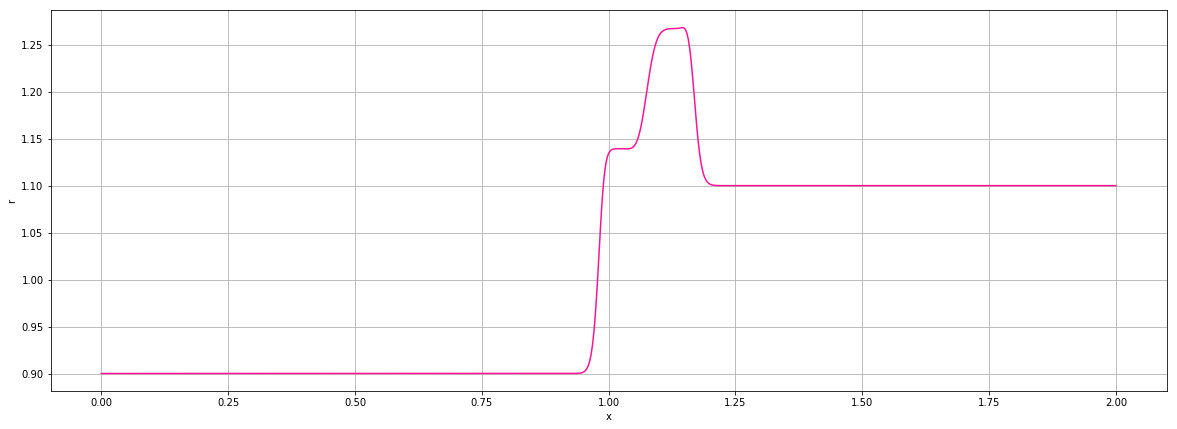

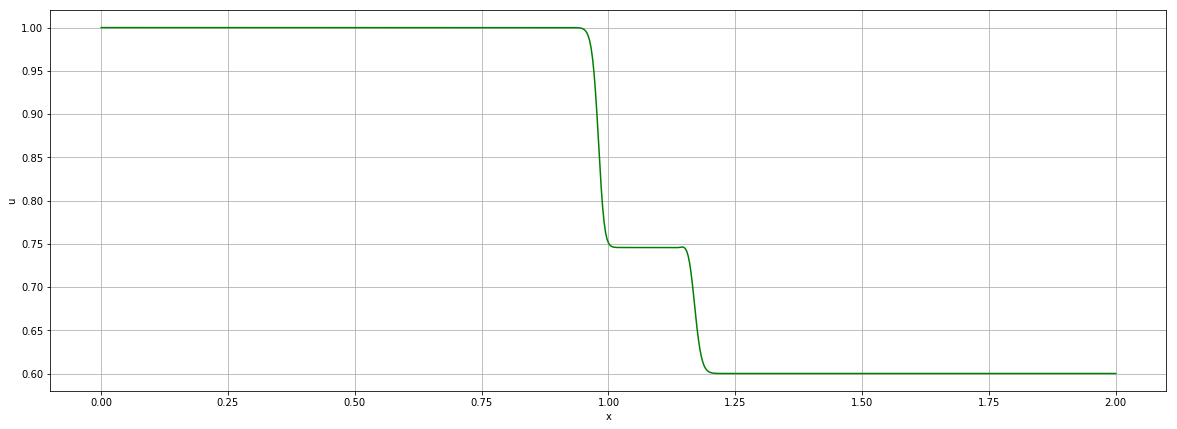

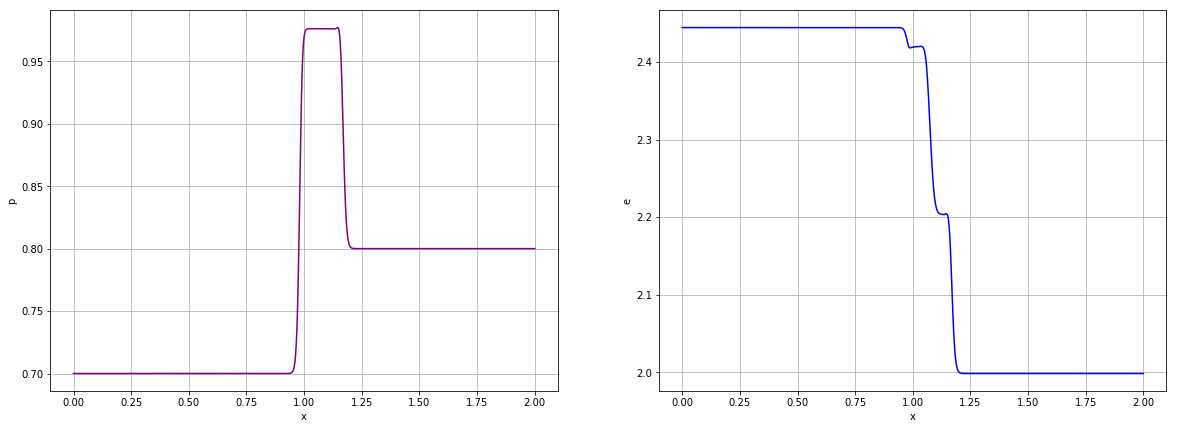

In [76]:
draw(f,r_v_p,699)

In [53]:
Courrant=0.05
N=700
t_number=700

xleft = 0
xright = 2
xmiddle = 1
h = (xright-xleft)/N
tau = Courrant*h
T = (int)(t_number*tau)

In [54]:
def initial(f):
    f[0,:int((xmiddle-xleft)/h)+1,0] = ro1
    f[0,int((xmiddle-xleft)/h)+1:,0] = ro2
    
    f[1,:int((xmiddle-xleft)/h)+1,0] = u1
    f[1,int((xmiddle-xleft)/h)+1:,0] = u2
    
    f[2,:int((xmiddle-xleft)/h)+1,0] = p1/(ro1*(gamma-1)) + u1**2/2
    f[2,int((xmiddle-xleft)/h)+1:,0] = p2/(ro2*(gamma-1)) + u2**2/2

def edge(f):
    f[0,0] = ro1
    f[0,N] = ro2
    
    f[1,0] = u1
    f[1,N] = u2
    
    f[2,0] = p1/(ro1*(gamma-1)) + u1**2/2
    f[2,N] = p2/(ro2*(gamma-1)) + u2**2/2

In [55]:
def Eiler(f,p):
    f_eil=np.zeros((3, N+1))
    f_eil[0]=f[0]
    u=f[1]
    for i in range(1,N):
        p_p=(p[i]+p[i+1])/2
        p_m=(p[i]+p[i-1])/2
        u_p=(u[i]+u[i+1])/2
        u_m=(u[i]+u[i-1])/2
        f_eil[1,i]=f[1,i]-Courrant*(p_p-p_m)/f[0,i]
        f_eil[2,i]=f[2,i]-Courrant*(p_p*u_p-p_m*u_m)/f[0,i]
    return f_eil

3

In [71]:
def nextLayer(f,n):
    f0=f[:,:,n]
    
    p=f0[0,:]*(f0[2,:]-f0[1,:]**2/2)*(gamma-1)
    
    #Eiler
    f_eil=Eiler(f0,p)
    edge(f_eil)
    for i in range(1,N):
        u_p=(f_eil[1,i]+f_eil[1,i+1])/2
        u_m=(f_eil[1,i]+f_eil[1,i-1])/2
        if(u_p>=0):
            D_p[i]=0
            Y_p[i]=f0[0,i]*np.abs(u_p)
        else:
            D_p[i]=1
            Y_p[i]=f0[0,i+1]*np.abs(u_p)
        if(u_m>=0):
            D_m[i]=1
            Y_m[i]=f0[0,i-1]*np.abs(u_m)
        else:
            D_m[i]=0
            Y_m[i]=f0[0,i]*np.abs(u_m)
        
        f1[0,i]=f0[0,i]+2*Courrant*((D_m[i]-0.5)*Y_m[i]+(D_p[i]-0.5)*Y_p[i])
        
        f1[1,i]=f_eil[1,i]*f0[0,i]/f1[0,i]+(
            f_eil[1,i]*((D_m[i]-1)*Y_m[i]+(D_p[i]-1)*Y_p[i])+
                f_eil[1,i-1]*D_m[i]*Y_m[i]+f_eil[1,i+1]*D_p[i]*Y_p[i])*Courrant/f1[0,i]
        
        f1[2,i]=f_eil[2,i]*f0[0,i]/f1[0,i]+(
            f_eil[2,i]*((D_m[i]-1)*Y_m[i]+(D_p[i]-1)*Y_p[i])+
                f_eil[2,i-1]*D_m[i]*Y_m[i]+f_eil[2,i+1]*D_p[i]*Y_p[i])*Courrant/f1[0,i]
    edge(f1)
    return f1

In [57]:
def getOriginal_r_v_p(f):
    originals=np.zeros_like(f)
    originals[0]=f[0]
    originals[1]=f[1]
    originals[2]=f[0]*(f[2]-f[1]**2/2)*(gamma-1)
    return originals

In [58]:
def draw(f,r_v_p,t):
    x = np.zeros((N+1))  
    for i in range(0, N+1):
        x[i] = i*h
        
        
    fig1 = plt.figure(figsize=(20,7))
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(x, r_v_p[0,:,t], color='deeppink')
    ax1.set_xlabel('x')
    ax1.set_ylabel('r')
    ax1.grid() 
    
    fig2 = plt.figure(figsize=(20,7))
    ax2 = fig2.add_subplot(1, 1, 1)
    ax2.plot(x, r_v_p[1,:,t], color='green')
    ax2.set_xlabel('x')
    ax2.set_ylabel('u')
    ax2.grid() 
    
    
    fig3 = plt.figure(figsize=(20,7))
    ax3 = fig3.add_subplot(1, 2, 1)
    ax3.plot(x, r_v_p[2,:,t], color='purple')
    ax3.set_xlabel('x')
    ax3.set_ylabel('p')
    ax3.grid() 

    ax6 = fig3.add_subplot(1, 2, 2)
    ax6.plot(x, f[2,:,t], color='blue')
    ax6.set_xlabel('x')
    ax6.set_ylabel('e')
    ax6.grid()